In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns
from library.sb_utils import save_file

Continue from our data wrangling, here we take a look at how the features in our dataset correlate to each other.

In [17]:
# Load the data. 
reviewdata=pd.read_csv('data/verified_purchase.csv')

In [18]:
reviewdata.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,helpful_votes_ratio
count,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06
mean,2.853273e+07,4.977244e+08,4.148925e+00,1.235769e+00,1.488756e+00,2.551940e-01
std,1.536502e+07,2.884760e+08,1.331552e+00,1.139431e+01,1.189656e+01,4.185744e-01
min,1.004900e+04,8.550000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.494642e+07,2.440889e+08,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.755064e+07,4.985021e+08,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.293682e+07,7.465106e+08,5.000000e+00,1.000000e+00,1.000000e+00,6.000000e-01
max,5.309657e+07,9.999961e+08,5.000000e+00,6.832000e+03,6.995000e+03,1.000000e+00


In [19]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000


First: let's take a look at the histogram of the "helpful_votes_ratio" below. We see that the majority of the votes are either very useful or not useful at all. There are very little votes in between.

In [20]:
sns.set(font_scale = 1.3)

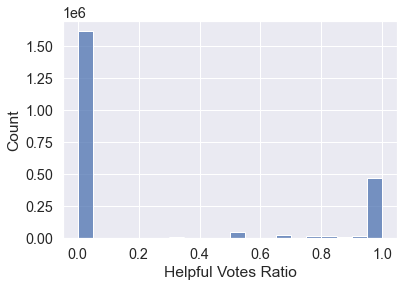

In [21]:
ax = sns.histplot(reviewdata['helpful_votes_ratio'], binwidth=0.05)
ax.set( xlabel='Helpful Votes Ratio')
plt.savefig("helpful_votes_ratio_histogram.png")
plt.show()

(array([2.255764e+06, 6.000000e+01, 9.000000e+00, 3.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([   0. ,  699.5, 1399. , 2098.5, 2798. , 3497.5, 4197. , 4896.5,
        5596. , 6295.5, 6995. ]),
 <BarContainer object of 10 artists>)

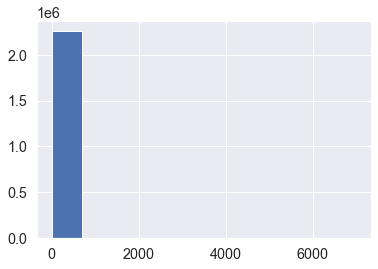

In [22]:
plt.hist(reviewdata['total_votes'])

(array([1491018.,  364560.,  143281.,   71749.,   43200.,   28289.,
          19691.,   14547.,   10762.,    8644.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

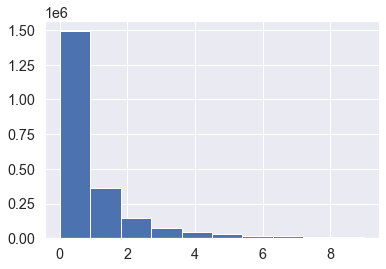

In [23]:
plt.hist(reviewdata[reviewdata['total_votes']<10]['total_votes'])

Let's also take a look at the how the helpful votes are distributed in a star_rating. The two histograms below show that they are quite similar to each other.

(array([1617070.,    2630.,    5910.,    9897.,    3336.,   56683.,
          26255.,   19781.,   30961.,  483316.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

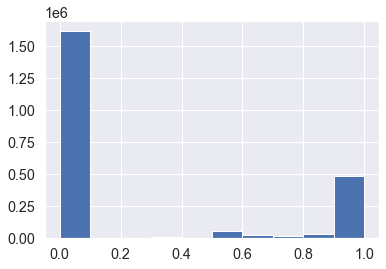

In [24]:
plt.hist(reviewdata['helpful_votes_ratio'])

(array([1.061354e+06, 3.430000e+02, 1.126000e+03, 2.643000e+03,
        5.330000e+02, 2.277700e+04, 9.945000e+03, 7.473000e+03,
        1.275500e+04, 2.817030e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

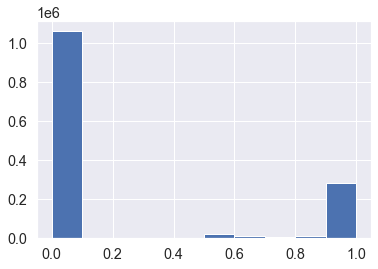

In [25]:
plt.hist(reviewdata[reviewdata['star_rating']==5]['helpful_votes_ratio'])

(array([126387.,   1441.,   2757.,   3654.,   1681.,  13726.,   6932.,
          5344.,   7379.,  58205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

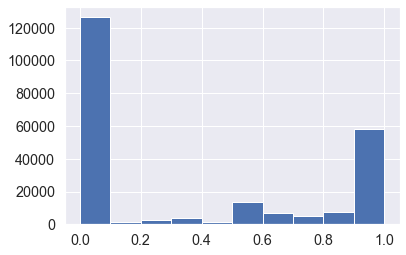

In [26]:
plt.hist(reviewdata[reviewdata['star_rating']==1]['helpful_votes_ratio'])

In the data above, there are many cases in which the total vote is zero which lead to a 0 helpful vote ratio. These cases should be different than the one where the helpful vote is zero while the total vote is not. The graphs below show the data in which the total vote is not zero. From these data, we see that many reviews dont have any vote at all. These reviews might be too short or useless to grasp people's attention.

(array([126052.,   2630.,   5910.,   9897.,   3336.,  56683.,  26255.,
         19781.,  30961., 483316.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

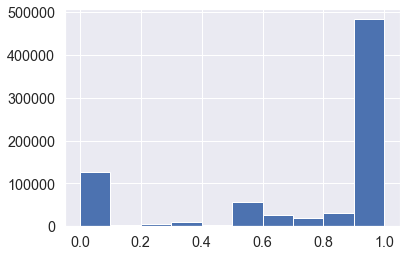

In [27]:
plt.hist(reviewdata[reviewdata['total_votes']!=0]['helpful_votes_ratio'])

In [28]:
reviewdata2=reviewdata[reviewdata['total_votes']!=0]

(array([23195.,  1441.,  2757.,  3654.,  1681., 13726.,  6932.,  5344.,
         7379., 58205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

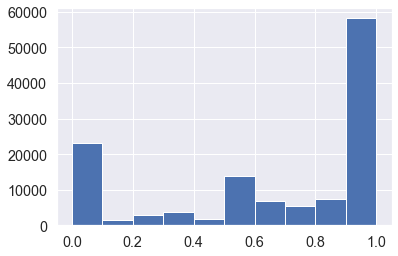

In [29]:
plt.hist(reviewdata2[reviewdata2['star_rating']==1]['helpful_votes_ratio'])

(array([ 58686.,    343.,   1126.,   2643.,    533.,  22777.,   9945.,
          7473.,  12755., 281703.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

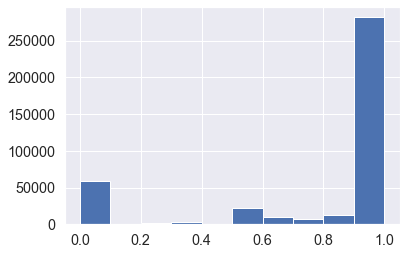

In [30]:
plt.hist(reviewdata2[reviewdata2['star_rating']==5]['helpful_votes_ratio'])

A full detailed analysis of the reviews will be reserved in our next section. But first we can use the length of a review as first glance analysis. 

In [31]:
reviewdata['review_length']=reviewdata['review_body'].map(len)

It seems most of the review are quite short while some are extremely long.

(array([2.254535e+06, 1.150000e+03, 1.120000e+02, 2.500000e+01,
        9.000000e+00, 3.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 3.000000e+00]),
 array([1.00000e+00, 4.88710e+03, 9.77320e+03, 1.46593e+04, 1.95454e+04,
        2.44315e+04, 2.93176e+04, 3.42037e+04, 3.90898e+04, 4.39759e+04,
        4.88620e+04]),
 <BarContainer object of 10 artists>)

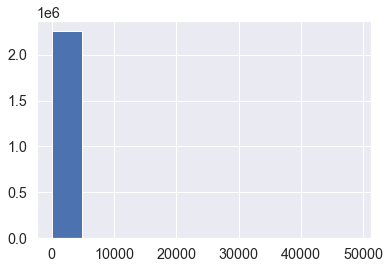

In [32]:
plt.hist(reviewdata['review_length'])

(array([762929., 711474., 295310., 161756.,  95228.,  62284.,  41386.,
         28817.,  20398.,  15111.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

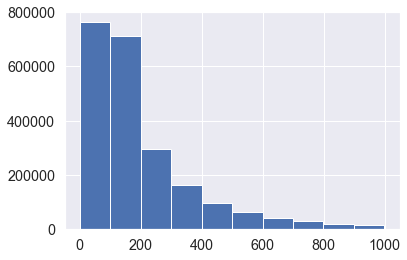

In [33]:
plt.hist(reviewdata[reviewdata['review_length']<1000]['review_length'])

(array([97., 25., 12.,  5.,  3.,  1.,  1.,  0.,  0.,  3.]),
 array([10074. , 13952.8, 17831.6, 21710.4, 25589.2, 29468. , 33346.8,
        37225.6, 41104.4, 44983.2, 48862. ]),
 <BarContainer object of 10 artists>)

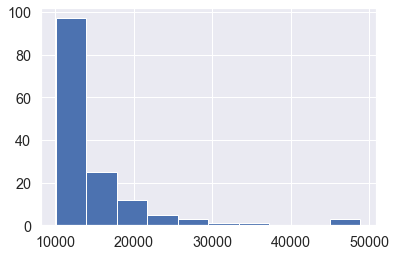

In [34]:
plt.hist(reviewdata[reviewdata['review_length']>10000]['review_length'])

In [35]:
for col in reviewdata:
    print(col,len(reviewdata[col].unique()))

marketplace 1
customer_id 1555997
review_id 2255839
product_id 283339
product_parent 251558
product_title 256449
product_category 1
star_rating 5
helpful_votes 535
total_votes 554
vine 2
verified_purchase 1
review_headline 1128661
review_body 2054872
review_date 5506
helpful_votes_ratio 2212
review_length 5550


We would like to use features such as product_id but the way they are arranged doesn't correlate with how helpful the vote is. To make thing more interesting, let's relabel these features with how much they appear in the review. 

In [36]:
countvalue=reviewdata['product_id'].value_counts()

In [37]:
countvalue=pd.DataFrame({'product_id':countvalue.index, 'occurence':countvalue.values})

In [38]:
countvalue.tail()

,product_id,occurence
283334,B00080HIVG,1
283335,B00IXWE14I,1
283336,B00BVLU0G6,1
283337,B000NIF42S,1
283338,B00M1018H6,1


In [39]:
count_average=np.zeros(len(countvalue['occurence']))

In [40]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [41]:
countvalue['arrange_product_id'] = count_average

In [42]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [43]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_id', right_on='product_id')

In [44]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,774697.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1964694.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,551698.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460633.0


In [45]:
countvalue=reviewdata['product_title'].value_counts()

In [46]:
countvalue=pd.DataFrame({'product_title':countvalue.index, 'occurence':countvalue.values})

In [47]:
count_average=np.zeros(len(countvalue['occurence']))

In [48]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [49]:
countvalue['arrange_product_title'] = count_average

In [50]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [51]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_title', right_on='product_title')

In [52]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,774697.0,700325.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1964694.0,1881711.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,551698.0,498391.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0,2099828.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460633.0,1848076.0


In [53]:
countvalue=reviewdata['product_parent'].value_counts()

In [54]:
countvalue=pd.DataFrame({'product_parent':countvalue.index, 'occurence':countvalue.values})

In [55]:
count_average=np.zeros(len(countvalue['occurence']))

In [56]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [57]:
countvalue['arrange_product_parent'] = count_average

In [58]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [59]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_parent', right_on='product_parent')

In [60]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title,arrange_product_parent
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,774697.0,700325.0,696055.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1964694.0,1881711.0,1885670.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,551698.0,498391.0,500576.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0,2099828.0,2103291.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460633.0,1848076.0,1845831.0


In [61]:
countvalue=reviewdata['customer_id'].value_counts()

In [62]:
countvalue=pd.DataFrame({'customer_id':countvalue.index, 'occurence':countvalue.values})

In [63]:
count_average=np.zeros(len(countvalue['occurence']))

In [64]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [65]:
countvalue['arrange_customer_id'] = count_average

In [66]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [67]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='customer_id', right_on='customer_id')

In [68]:
summarize=reviewdata[['star_rating','helpful_votes','total_votes','helpful_votes_ratio','review_length','arrange_product_id','arrange_product_title','arrange_product_parent','arrange_customer_id']]

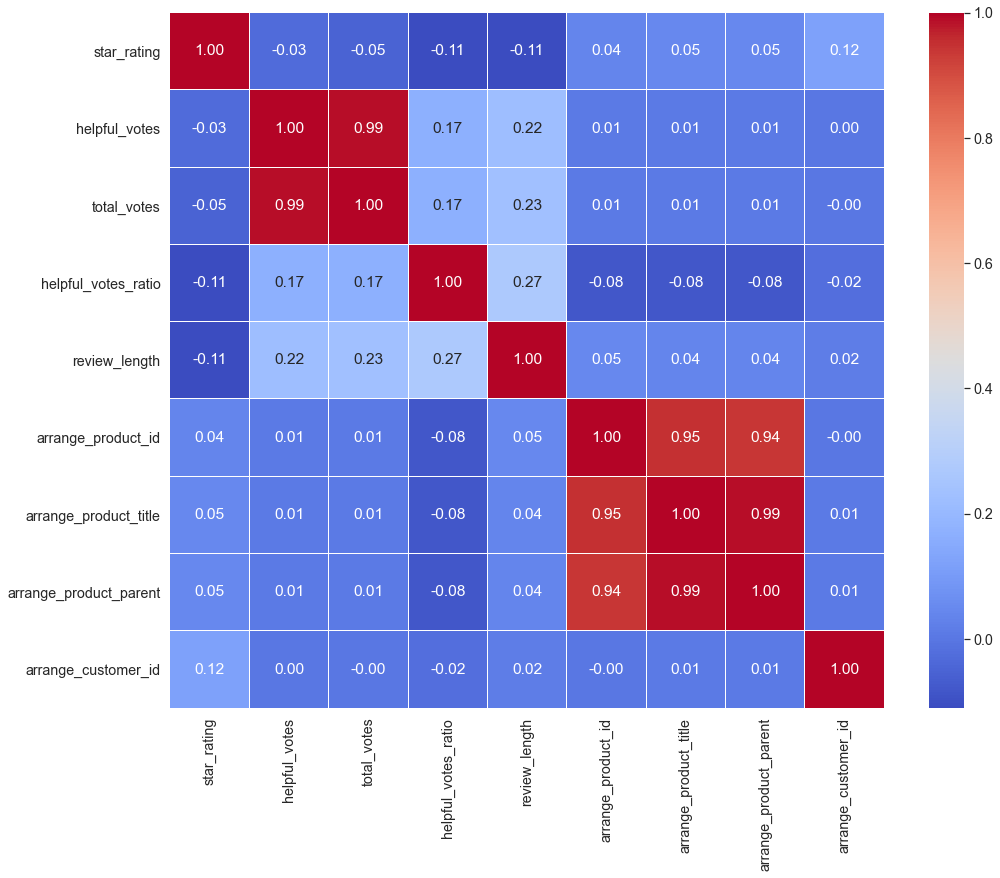

In [71]:
corrmat = summarize.corr()
f, ax = plt.subplots(figsize=(16, 12))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.savefig("Feature_correlation.png", bbox_inches="tight")

In [53]:
summarize.iloc[:100]

,star_rating,helpful_votes,total_votes,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title,arrange_product_parent,arrange_customer_id
0,5,0,0,0.000000,14,783255.0,696893.0,696055.0,1015876.0
1,5,0,1,0.000000,155,1964694.0,1881711.0,1885670.0,1801693.0
2,5,0,0,0.000000,47,554316.0,499073.0,500576.0,548574.0
3,1,2,3,0.666667,735,2150992.0,2099828.0,2103291.0,719312.0
4,4,0,0,0.000000,31,1460506.0,1848076.0,1845831.0,103335.0
...,...,...,...,...,...,...,...,...,...
95,5,0,0,0.000000,13,536488.0,469352.0,478564.0,941495.0
96,1,6,10,0.600000,40,332974.0,283726.0,260206.0,1434514.0
97,5,1,1,1.000000,356,882836.0,798179.0,792179.0,1533322.0
98,5,0,0,0.000000,85,1202580.0,1091903.0,1085953.0,679654.0


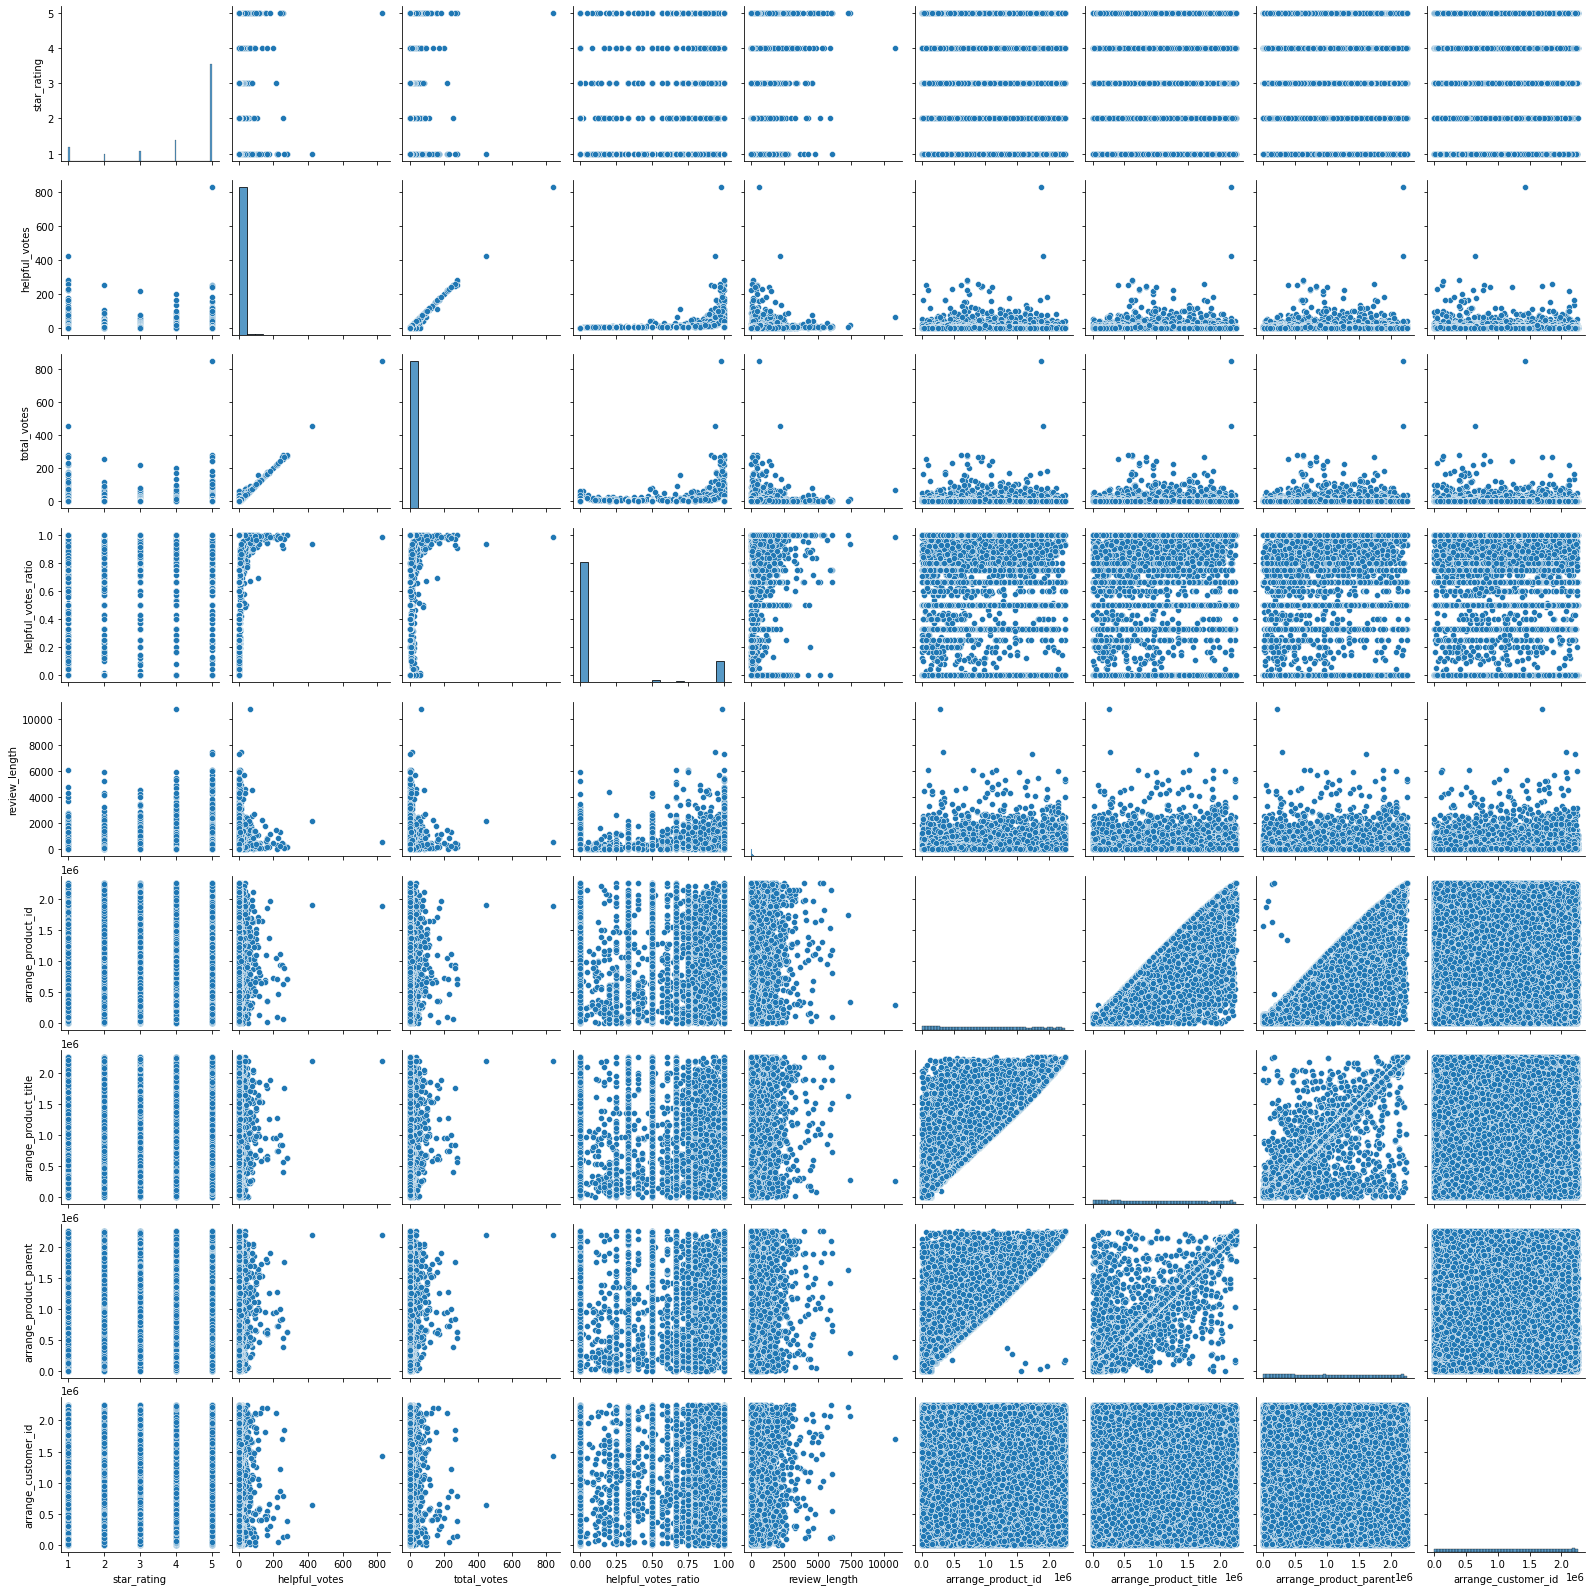

In [54]:
sns.pairplot(summarize.iloc[:100000])

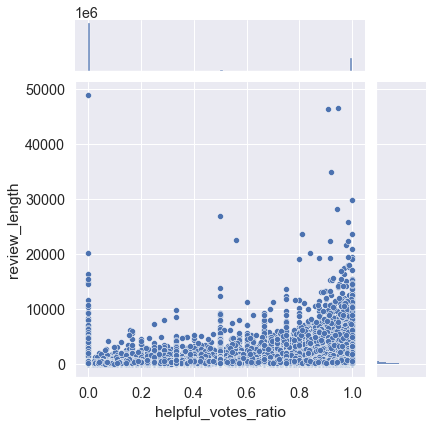

In [74]:
sns.jointplot(y='review_length', x='helpful_votes_ratio', data=summarize)
plt.savefig("review_length_vs_helpful_votes_ratio.png", bbox_inches="tight")

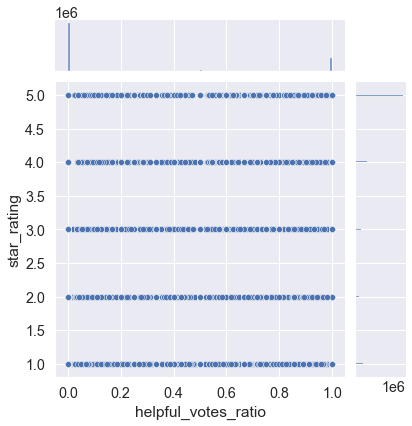

In [73]:
sns.jointplot(y='star_rating', x='helpful_votes_ratio', data=summarize)

According to these initial analysis, there's little correlation for the helpful_vote_ratio to features such as the products and the identity of the customers giving it. The length of the review did show some correlation to how helpful the review is. This makes sense since usually the reviews that helpful are not short review like " It's a good product" or "I like it". In the later part of this project, we will dwell more into the structures of the reviews such as its tokens, TFIDF, and cosine correlation.

In [70]:
# save the data to a new csv file
summarize=reviewdata[['star_rating','helpful_votes','total_votes','helpful_votes_ratio','review_length','arrange_product_id','arrange_product_title','arrange_product_parent','arrange_customer_id','product_title','review_body']]
datapath = 'data'
save_file(summarize, 'clean_up_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data\clean_up_data.csv"
